Per il preprocessing serve fare una pipeline in cui:
- vengono gestiti i valori Nan
- viene fatto encoding o standardizzazione

Pipeline diverse per tipi di dato diversi

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('data.csv')


In [2]:


binary_cols = ['HLTHPLN1','MEDCOST','TOLDHI2','CVDINFR4',
            'CVDCRHD4','CVDSTRK3','ASTHMA3','CHCSCNCR','CHCOCNCR',
            'CHCCOPD1','HAVARTH3','ADDEPEV2','CHCKIDNY','VETERAN3',
            'INTERNET','QLACTLM2','USEEQUIP','BLIND','DECIDE',
            'DIFFWALK','DIFFDRES','DIFFALON','SMOKE100','EXERANY2','FLUSHOT6',
            'PNEUVAC3', 'HIVTST6', 'PERSDOC2', 'BPHIGH4'] 

nominal_cols = [
    'MARITAL','EMPLOY1','_RACE', '_BMI5CAT'
]

numeric_cols = [
    'PHYSHLTH','CHILDREN',
    'ALCDAY5', 'FRUITJU1',  'STRENGTH',
    'FRUIT1', 'FVBEANS','FVGREEN',
    'FVORANG','VEGETAB1'
]

ordinal = {
    'GENHLTH':       [1,2,3,4,5],       # 1=Excellent … 5=Poor
    'CHECKUP1':      [1,2,3,4,5,6,7,8], # 
    'CHOLCHK':       [1,2,3,4],         
    '_AGE_G':        [1,2,3,4,5,6],     # 1=18–24 … 6=65+
    '_PACAT1':       [1,2,3,4],         # 1=High active … 4=Inactive     
    'EDUCA':         [1,2,3,4,5,6],     # 1=Less than high school … 6=Post-grad
    'INCOME2':       [1,2,3,4,5,6,7,8], # 1=Less than $10K … 8=$75K or more
}


"""
# 2) Cast nominali a 'category' (manteniamo i codici numerici)
for col in nominal_cols:
    df[col] = df[col].astype('category')

# 3) Cast ordinali a 'category' con ordered=True
for col, cats in ordinal_asc.items():
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    df[col] = df[col].astype(cat_type)

for col, cats in ordinal_desc.items():
    cat_type = CategoricalDtype(categories=cats, ordered=True)
    df[col] = df[col].astype(cat_type)
"""
# Nominali: stringa coerente
for col in nominal_cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].replace(['nan', 'None', '-9223372036854775808'], np.nan)

# Ordinali: forzati a float con NaN se conversione fallisce
for col in list(ordinal.keys()):
    df[col] = pd.to_numeric(df[col], errors='coerce')


df[binary_cols] = df[binary_cols].astype('Int64')

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213674 entries, 0 to 213673
Data columns (total 51 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   213480 non-null  float64
 1   PHYSHLTH  211979 non-null  float64
 2   HLTHPLN1  213570 non-null  Int64  
 3   PERSDOC2  213524 non-null  Int64  
 4   MEDCOST   213507 non-null  Int64  
 5   CHECKUP1  213063 non-null  float64
 6   BPHIGH4   213531 non-null  Int64  
 7   CHOLCHK   213049 non-null  float64
 8   TOLDHI2   213129 non-null  Int64  
 9   CVDINFR4  213232 non-null  Int64  
 10  CVDCRHD4  212736 non-null  Int64  
 11  CVDSTRK3  213424 non-null  Int64  
 12  ASTHMA3   213485 non-null  Int64  
 13  CHCSCNCR  213515 non-null  Int64  
 14  CHCOCNCR  213529 non-null  Int64  
 15  CHCCOPD1  213236 non-null  Int64  
 16  HAVARTH3  213336 non-null  Int64  
 17  ADDEPEV2  213428 non-null  Int64  
 18  CHCKIDNY  213294 non-null  Int64  
 19  DIABETE3  213674 non-null  object 
 20  MARI

In [3]:

from sklearn.model_selection import train_test_split
"""""
# Rimuove ogni tipo categorico residuo
for col in df.columns:
    if pd.api.types.is_categorical_dtype(df[col]):
        df[col] = df[col].astype(str)  # resetta tipo
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except:
            pass
"""""
# Definizione feature e target
X = df.drop(columns=['DIABETE3'])
y = df['DIABETE3']

# Split stratificato
X_train, X_test, y_train, y_test = train_test_split(
X, y, stratify=y, test_size=0.35, random_state=42
)
y_map = {'NoDiabetes': 0, 'PreDiabetes': 1, 'Diabetes': 2}
y_train = y_train.map(y_map)
y_test = y_test.map(y_map)
print(y_train.value_counts())
print(y_test.value_counts())


DIABETE3
0    104377
2     30439
1      4072
Name: count, dtype: int64
DIABETE3
0    56203
2    16390
1     2193
Name: count, dtype: int64


# PROVA DI RANDOM FOREST CON SMOTE

 Split valido trovato al tentativo 1


🔍 Valutazione modelli:  14%|█▍        | 1/7 [15:09<1:30:56, 909.41s/it]

Classe 0 ➤ Precision: 0.833, Recall: 0.919, F1: 0.874
Classe 1 ➤ Precision: 0.083, Recall: 0.000, F1: 0.000
Classe 2 ➤ Precision: 0.592, Recall: 0.461, F1: 0.518


/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWar

Classe 0 ➤ Precision: 0.922, Recall: 0.664, F1: 0.772
Classe 1 ➤ Precision: 0.050, Recall: 0.359, F1: 0.088
Classe 2 ➤ Precision: 0.504, Recall: 0.571, F1: 0.535


🔍 Valutazione modelli:  43%|████▎     | 3/7 [31:02<39:50, 597.66s/it]

Classe 0 ➤ Precision: 0.880, Recall: 0.784, F1: 0.830
Classe 1 ➤ Precision: 0.063, Recall: 0.038, F1: 0.047
Classe 2 ➤ Precision: 0.467, Recall: 0.666, F1: 0.549


🔍 Valutazione modelli:  57%|█████▋    | 4/7 [34:32<22:13, 444.46s/it]

Classe 0 ➤ Precision: 0.824, Recall: 0.805, F1: 0.814
Classe 1 ➤ Precision: 0.048, Recall: 0.060, F1: 0.053
Classe 2 ➤ Precision: 0.417, Recall: 0.436, F1: 0.426


🔍 Valutazione modelli:  71%|███████▏  | 5/7 [49:18<20:07, 603.62s/it]

Classe 0 ➤ Precision: 0.900, Recall: 0.569, F1: 0.697
Classe 1 ➤ Precision: 0.041, Recall: 0.230, F1: 0.070
Classe 2 ➤ Precision: 0.375, Recall: 0.616, F1: 0.466


🔍 Valutazione modelli:  86%|████████▌ | 6/7 [51:02<07:13, 433.70s/it]

Classe 0 ➤ Precision: 0.901, Recall: 0.616, F1: 0.732
Classe 1 ➤ Precision: 0.039, Recall: 0.291, F1: 0.069
Classe 2 ➤ Precision: 0.455, Recall: 0.558, F1: 0.501


/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:04:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:06:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:07:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [01:08:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not

Classe 0 ➤ Precision: 0.844, Recall: 0.928, F1: 0.884
Classe 1 ➤ Precision: 0.067, Recall: 0.000, F1: 0.000
Classe 2 ➤ Precision: 0.628, Recall: 0.497, F1: 0.555
                 Model  Balanced Accuracy  Accuracy  Precision    Recall  \
0        Random Forest           0.459994  0.791530   0.502749  0.459994   
1  Logistic Regression           0.531321  0.634792   0.491882  0.531321   
2             AdaBoost           0.496078  0.736529   0.469923  0.496078   
3        Decision Tree           0.433554  0.702256   0.429560  0.433554   
4                  KNN           0.471820  0.569372   0.438535  0.471820   
5             Bayesian           0.488349  0.593874   0.465122  0.488349   
6              XGBoost           0.475051  0.806081   0.512649  0.475051   

   F1 Score  
0  0.464163  
1  0.465082  
2  0.475212  
3  0.431230  
4  0.410946  
5  0.434063  
6  0.479687  


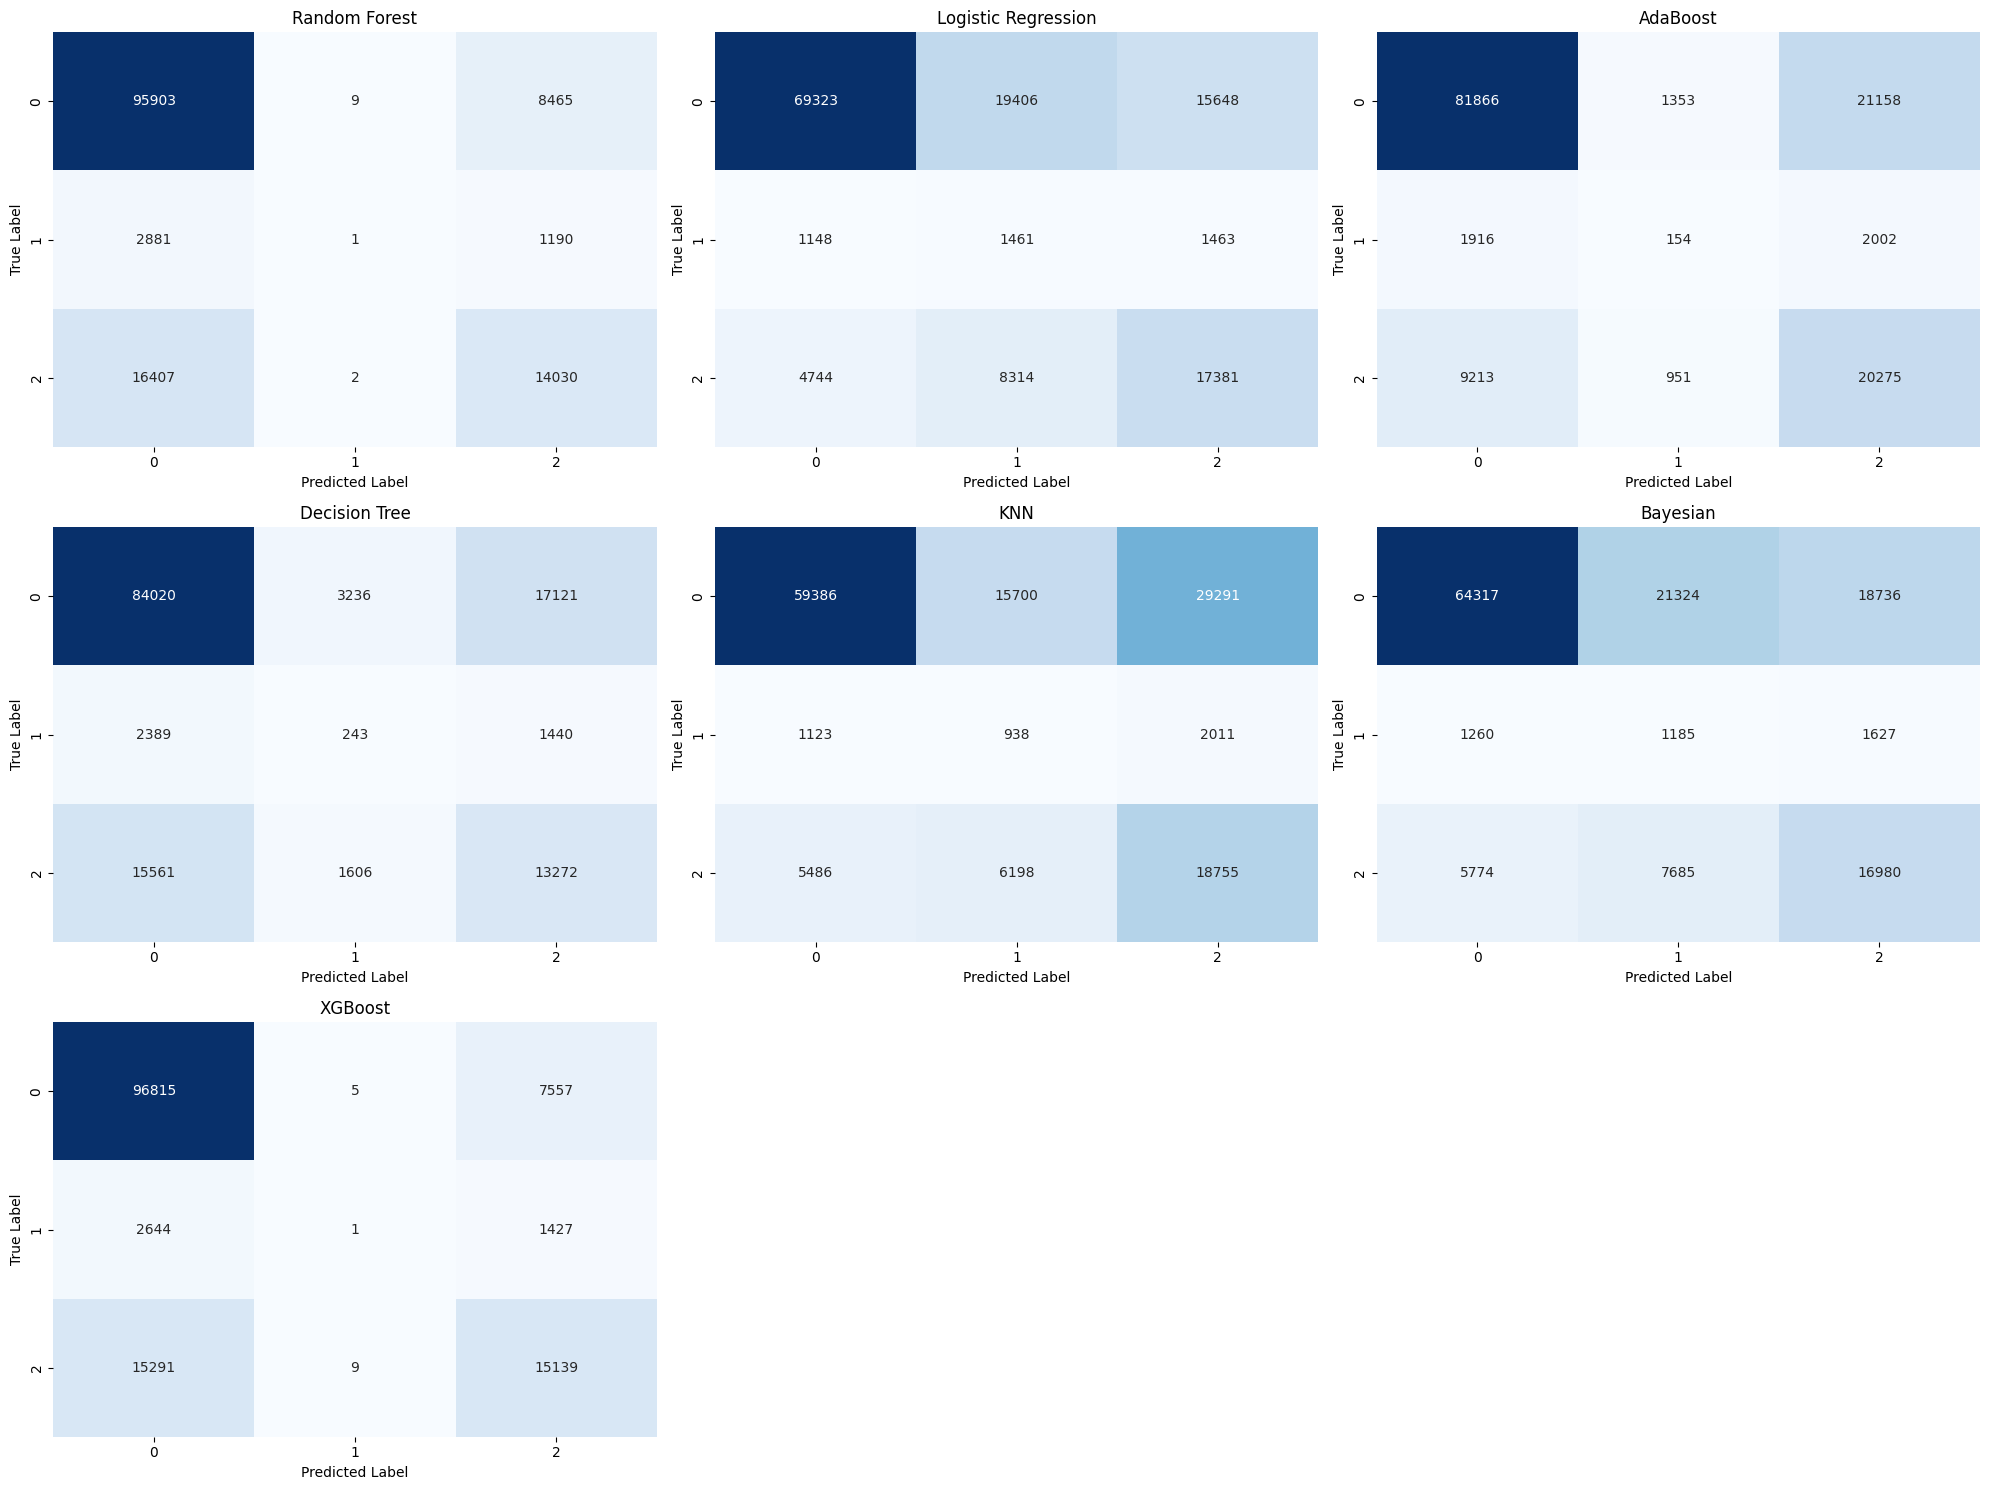

In [4]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, roc_auc_score, roc_curve, auc)
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm  # ✅ Aggiunto tqdm per barre di avanzamento

from prep.preprocessor import preprocessor
from prep.DiabetesFeatureEngineer import DiabetesFeatureEngineer

def stratified_kfold_strict(X, y, n_splits=3, max_tries=100):
    for attempt in range(max_tries):
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=attempt)
        valid = True
        for _, test_idx in skf.split(X, y):
            classes_in_fold = set(y.iloc[test_idx])
            if not {0, 1, 2}.issubset(classes_in_fold):
                valid = False
                break
        if valid:
            print(f" Split valido trovato al tentativo {attempt+1}")
            return skf
    raise ValueError("Impossibile trovare uno split con tutte le classi in ogni fold.")


# === MODELLI ===
models = {
    'Random Forest': RandomForestClassifier(random_state=42,class_weight='balanced'),
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial', solver='lbfgs',random_state=42),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42,class_weight='balanced'),
    'KNN': KNeighborsClassifier(weights='distance'),
    'Bayesian': GaussianNB(),
    'XGBoost': XGBClassifier(objective='multi:softprob', num_class=3, eval_metric='mlogloss', use_label_encoder=False, random_state=42)
}

# === STRATIFIED CV ===
skf = stratified_kfold_strict(X_train, y_train, n_splits=5)

n_classes = 3  # 0=no diabete, 1=prediabete, 2=diabete

model_scores = {}
conf_matrices = {}
all_results = []

# === LOOP PER MODELLO CON TQDM ===
for model_name, model in tqdm(models.items(), desc="🔍 Valutazione modelli"):

    pipeline = Pipeline(steps=[
        ('feature_engineering', DiabetesFeatureEngineer()),
        ('preprocessing', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    y_true = []
    y_pred = []
    y_prob_all = []

    # LOOP CON TQDM SUI FOLD
    for fold_idx, (train_idx, test_idx) in enumerate(tqdm(skf.split(X_train, y_train), total=5, desc=f"📂 CV {model_name}")):
        X_fold_train, y_fold_train = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_fold_test,  y_fold_test  = X_train.iloc[test_idx],  y_train.iloc[test_idx]

        pipeline.fit(X_fold_train, y_fold_train)

        y_pred_fold = pipeline.predict(X_fold_test)
        y_prob_fold = pipeline.predict_proba(X_fold_test)

        y_true.extend(y_fold_test)
        y_pred.extend(y_pred_fold)
        y_prob_all.extend(y_prob_fold)

    # === METRICHE ===
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_prob_all = np.array(y_prob_all)


    
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    precision_per_class = precision_score(y_true, y_pred, average=None, zero_division=0)
    recall_per_class    = recall_score(y_true, y_pred, average=None, zero_division=0)
    f1_per_class        = f1_score(y_true, y_pred, average=None, zero_division=0)
    
    for i, (p, r, f) in enumerate(zip(precision_per_class, recall_per_class, f1_per_class)):
        print(f"Classe {i} ➤ Precision: {p:.3f}, Recall: {r:.3f}, F1: {f:.3f}")


    all_results.append({
        'Model': model_name,
        'Balanced Accuracy': balanced_acc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrices[model_name] = conf_matrix

    fpr = dict()
    tpr = dict()



# === RISULTATI ===
results_df = pd.DataFrame(all_results)
print(results_df)



# === CONFUSION MATRICES ===
num_models = len(models)
cols = 3
rows = num_models // cols + int(num_models % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for idx, (model_name, conf_matrix) in enumerate(conf_matrices.items()):
    ax = axes[idx]
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

for idx in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

